In [40]:
import pandas as pd
print(pd.__version__)

import os
import pandas as pd
import numpy as np

def process_files_ignore_nonnumeric(directory, file_extension='csv'):
    """
    Process all files in the specified directory with the given file extension.
    Calculates the mean of each numeric column and appends it to the file.
    Non-numeric columns are ignored.
    
    :param directory: Directory containing the files
    :param file_extension: Extension of the files to process (default is 'csv')
    """
    # List all files in the directory with the specified extension
    for filename in os.listdir(directory):
        if filename.endswith(f".{file_extension}"):
            file_path = os.path.join(directory, filename)
            
            # Read the file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Calculate mean of each numeric column
            means = df.select_dtypes(include=[np.number]).mean()
            
            # Append the mean as a new row (NaN for non-numeric columns)
            mean_row = pd.Series({col: means[col] if col in means else np.nan for col in df.columns})
            df = pd.concat([df, pd.DataFrame([mean_row])], ignore_index=True)
            
            # Save the updated DataFrame back to file
            df.to_csv(file_path, index=False)
            print(f"Processed and updated {filename}")

directory = "/home/monika/Downloads/stats"
process_files_ignore_nonnumeric(directory)  # This will process CSV files in the specified directory

2.1.4
Processed and updated DenseNet121.csv
Processed and updated EfficientNetpretrained.csv
Processed and updated DenseNet121pretrained.csv
Processed and updated VGG.csv
Processed and updated DenseNet121pretrainedHSV.csv
Processed and updated EfficientNetHSV.csv
Processed and updated VGGpretrainedHSV.csv
Processed and updated MobileNetpretrainedHSV.csv
Processed and updated ResNet50HSV.csv
Processed and updated MobileNetpretrained.csv
Processed and updated VGGpretrained.csv
Processed and updated EfficientNet.csv
Processed and updated ResNet50pretrainedHSV.csv
Processed and updated ResNet18pretrained.csv
Processed and updated VGGHSV.csv
Processed and updated ResNet18pretrainedHSV.csv
Processed and updated MobileNet.csv
Processed and updated EfficientNetpretrainedHSV.csv
Processed and updated ResNet18HSV.csv
Processed and updated ResNet18.csv
Processed and updated ResNet50.csv
Processed and updated MobileNetHSV.csv
Processed and updated DenseNet121HSV.csv
Processed and updated ResNet50p

In [38]:
import os
import pandas as pd

def create_global_analysis_file(directory, output_file='globalanalysis.csv', file_extension='csv'):
    """
    Create a file that compiles the mean values for each file in the directory.
    The file will have common headers, with file names on the left column and
    mean values for each header calculated.
    
    :param directory: Directory containing the files to process
    :param output_file: Name of the file to be created (default is 'globalanalysis.csv')
    :param file_extension: Extension of the files to process (default is 'csv')
    """
    all_means = []

    # Extract mean values from each file
    for filename in os.listdir(directory):
        if filename.endswith(f".{file_extension}"):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)

            # Assuming the last row contains the means
            means = df.iloc[-1]
            means.name = filename  # Set the filename as the name of the Series
            all_means.append(means)

    # Combine all means into a single DataFrame
    combined_means = pd.concat(all_means, axis=1).T

    # Set the index to file names and reset it to make it a column
    combined_means.index.name = 'File'
    combined_means.reset_index(inplace=True)

    # Save to the specified output file
    combined_means.to_csv(output_file, index=False)
    print(f"Global analysis file created: {output_file}")

# Usage
directory = "/home/monika/Downloads/stats"
output_directory = "/home/monika/Downloads/stats/globalanalysis"
output_file_path = os.path.join(output_directory, 'globalanalysis.csv')
create_global_analysis_file(directory, output_file=output_file_path)

Global analysis file created: /home/monika/Downloads/stats/globalanalysis/globalanalysis.csv


In [66]:
import pandas as pd
import os

def process_file(file_path):
    # Read the file into a DataFrame
    df = pd.read_csv(file_path)

    # Calculate mean for numeric columns, ignoring non-numeric ones
    means = df.select_dtypes(include=['number']).mean()
    means_row = pd.DataFrame([means], index=['mean'], columns=df.columns)

    # Calculate standard deviation for numeric columns
    stds = df.select_dtypes(include=['number']).std()
    stds_row = pd.DataFrame([stds], index=['std'], columns=df.columns)

    # Append the mean and standard deviation rows to the DataFrame
    modified_df = pd.concat([df, means_row, stds_row], ignore_index=False)

    # Save the modified DataFrame back to the file
    modified_df.to_csv(file_path, index=False)

def process_directory(directory_path):
    # Loop through all files in the directory
    for file in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file)
        # Check if it's a file and not a directory
        if os.path.isfile(file_path):
            process_file(file_path)

#function usage
directory_path = '/home/monika/Downloads/wandbglioma_STD'
process_directory(directory_path)

In [39]:
import os
import pandas as pd

directory_path = '/home/monika/Downloads/stats'
#headers_to_remove = ["Name", State", "Notes", "User", "Tags", "Created", "Runtime", "Sweep", "batch_size", "criterion", "learning_rate"]
headers_to_remove = ["Name", "State", "Notes", "User", "Tags", "Created", "Sweep", "batch_size", "criterion", "learning_rate"]

# Function to remove headers from a CSV file
def remove_headers_from_csv(file_path, headers_to_remove):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Remove the specified headers if they exist in the DataFrame
        df = df.drop(columns=[col for col in headers_to_remove if col in df.columns], errors='ignore')
        
        # Save the DataFrame back to CSV, without the index
        df.to_csv(file_path, index=False)
        print(f"Processed file: {file_path}")
    except Exception as e:
        print(f"An error occurred with file: {file_path}. Error: {e}")

# List all CSV files in the directory and process each one
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        remove_headers_from_csv(file_path, headers_to_remove)

Processed file: /home/monika/Downloads/stats/DenseNet121.csv
Processed file: /home/monika/Downloads/stats/EfficientNetpretrained.csv
Processed file: /home/monika/Downloads/stats/DenseNet121pretrained.csv
Processed file: /home/monika/Downloads/stats/VGG.csv
Processed file: /home/monika/Downloads/stats/DenseNet121pretrainedHSV.csv
Processed file: /home/monika/Downloads/stats/EfficientNetHSV.csv
Processed file: /home/monika/Downloads/stats/VGGpretrainedHSV.csv
Processed file: /home/monika/Downloads/stats/MobileNetpretrainedHSV.csv
Processed file: /home/monika/Downloads/stats/ResNet50HSV.csv
Processed file: /home/monika/Downloads/stats/MobileNetpretrained.csv
Processed file: /home/monika/Downloads/stats/VGGpretrained.csv
Processed file: /home/monika/Downloads/stats/EfficientNet.csv
Processed file: /home/monika/Downloads/stats/ResNet50pretrainedHSV.csv
Processed file: /home/monika/Downloads/stats/ResNet18pretrained.csv
Processed file: /home/monika/Downloads/stats/VGGHSV.csv
Processed file: 

In [161]:
import pandas as pd
import numpy as np

def append_extremes_to_file(file_path):
    """
    Append the 3 highest and 3 lowest values of each column to the bottom of the file.

    :param file_path: Path to the CSV file
    """
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Create an empty DataFrame to hold the extreme values
    extremes_df = pd.DataFrame(index=["Top 1", "Top 2", "Top 3", "Bottom 1", "Bottom 2", "Bottom 3"])

    # Calculate and append extremes for each column, except the first one (assumed to be 'File')
    for column in df.columns[1:]:
        # Get the top 3 and bottom 3 values
        top_3 = df[column].nlargest(3).values
        bottom_3 = df[column].nsmallest(3).values

        # Combine top and bottom values
        extreme_values = np.concatenate([top_3, bottom_3])

        # Append to the extremes DataFrame
        extremes_df[column] = extreme_values

    # Append the extremes DataFrame to the original DataFrame
    combined_df = pd.concat([df, extremes_df])

    # Save the updated DataFrame back to the file
    combined_df.to_csv(file_path, index=False)
    print(f"Updated file with extreme values saved at: {file_path}")

# File path
file_path = "/home/monika/Downloads/stats/globalanalysis/globalanalysis.csv"
append_extremes_to_file(file_path)

Updated file with extreme values saved at: /home/monika/Downloads/stats/globalanalysis/globalanalysis.csv


In [162]:
import pandas as pd

# Define the file path
file_path = '/home/monika/Downloads/stats/globalanalysis/globalanalysis.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Sort the DataFrame by the 'val_accuracy' column in descending order
df.sort_values(by='val_accuracy', ascending=False, inplace=True)

# Save the sorted DataFrame back to the CSV file
df.to_csv(file_path, index=False)

print("CSV file has been sorted and updated.")

CSV file has been sorted and updated.


Name is not numeric and will be skipped
Shapiro-Wilk Test for test_accuracy: Statistic = 0.970700740814209, P-value = 3.531559923430905e-05
test_accuracy does not look normally distributed (reject H0)


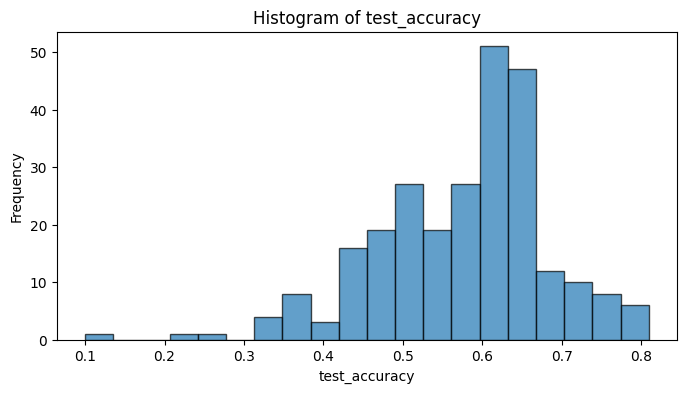

Shapiro-Wilk Test for test_f1: Statistic = 0.9900702834129333, P-value = 0.07327345758676529
test_f1 looks normally distributed (fail to reject H0)


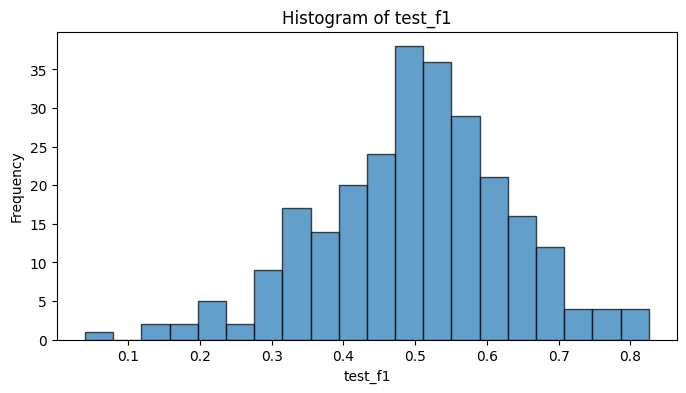

Shapiro-Wilk Test for test_loss: Statistic = 0.25728487968444824, P-value = 5.874554177132697e-31
test_loss does not look normally distributed (reject H0)


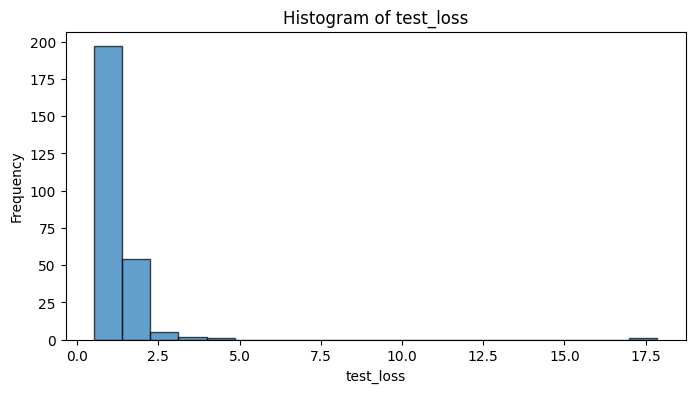

Shapiro-Wilk Test for test_precision: Statistic = 0.9901789426803589, P-value = 0.07690846920013428
test_precision looks normally distributed (fail to reject H0)


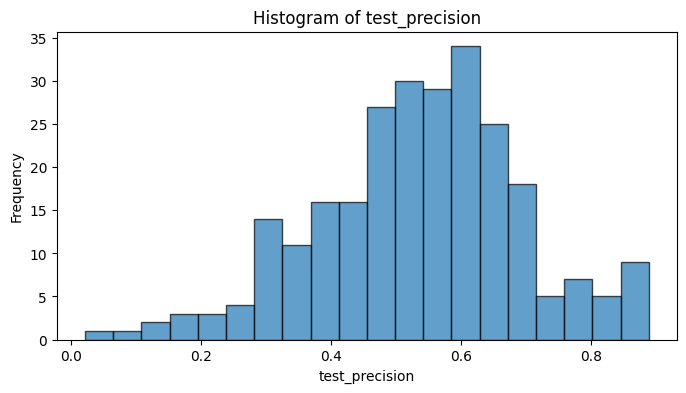

Shapiro-Wilk Test for test_recall: Statistic = 0.9924461841583252, P-value = 0.20772676169872284
test_recall looks normally distributed (fail to reject H0)


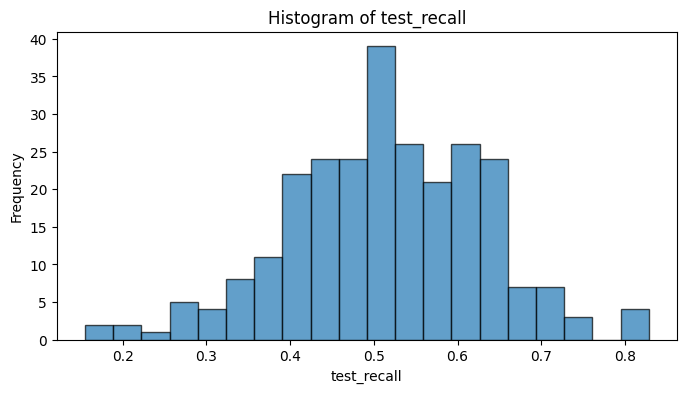

Shapiro-Wilk Test for train_accuracy: Statistic = 0.9510341882705688, P-value = 1.1623198048482664e-07
train_accuracy does not look normally distributed (reject H0)


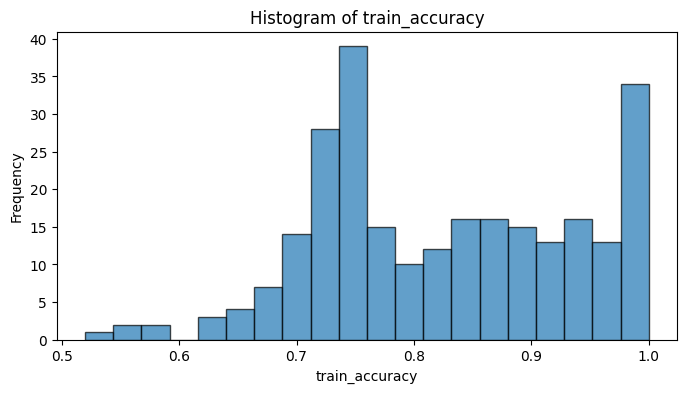

Shapiro-Wilk Test for train_f1: Statistic = 0.9571791887283325, P-value = 5.907729132559325e-07
train_f1 does not look normally distributed (reject H0)


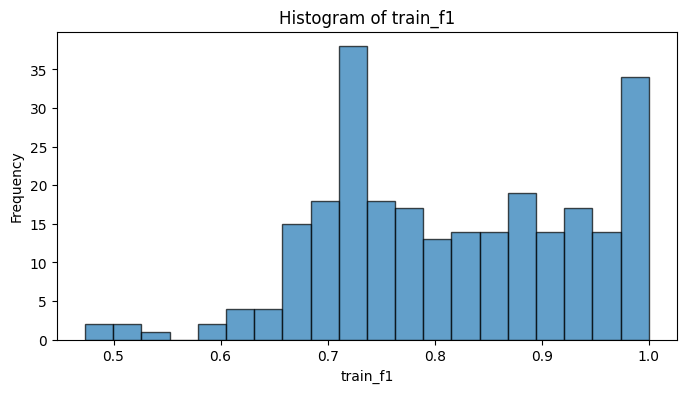

Shapiro-Wilk Test for train_loss: Statistic = 0.934275209903717, P-value = 2.3498443191272145e-09
train_loss does not look normally distributed (reject H0)


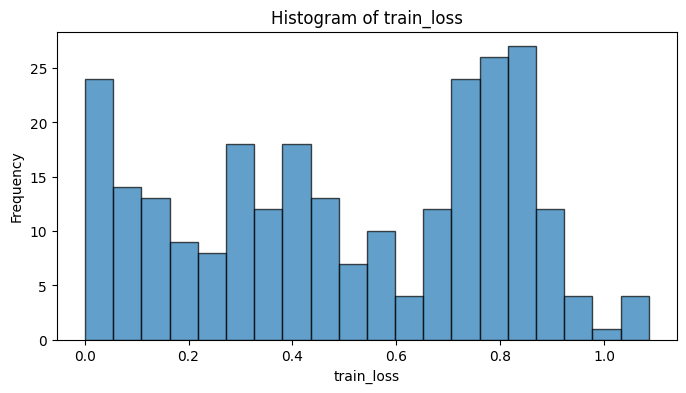

Shapiro-Wilk Test for train_precision: Statistic = 0.945802628993988, P-value = 3.187809127780383e-08
train_precision does not look normally distributed (reject H0)


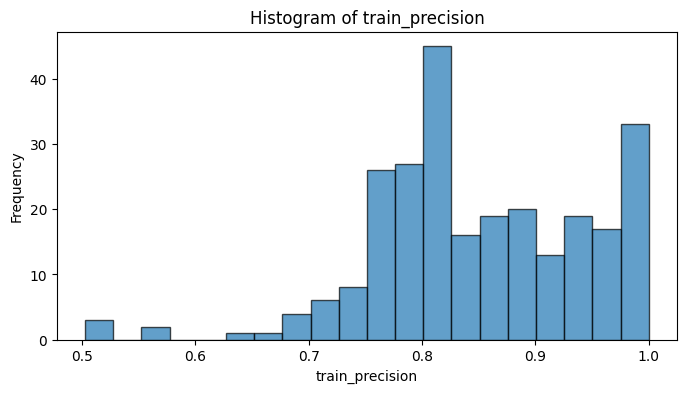

Shapiro-Wilk Test for train_recall: Statistic = 0.9521155953407288, P-value = 1.5338018499733153e-07
train_recall does not look normally distributed (reject H0)


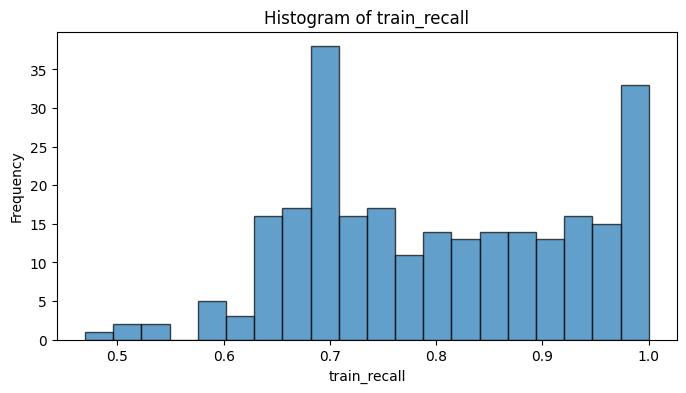

Shapiro-Wilk Test for val_accuracy: Statistic = 0.9784752726554871, P-value = 0.0005662980256602168
val_accuracy does not look normally distributed (reject H0)


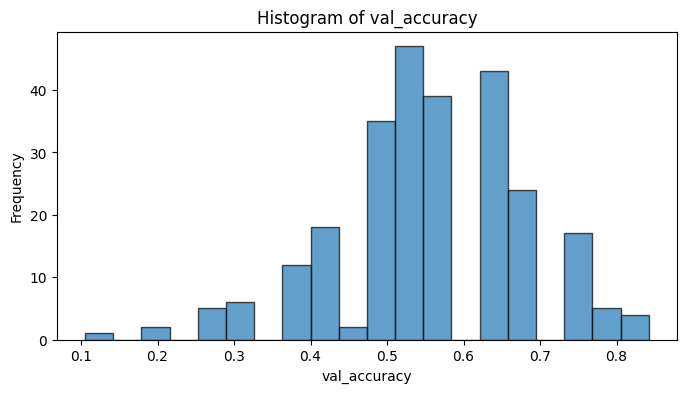

Shapiro-Wilk Test for val_f1: Statistic = 0.994676947593689, P-value = 0.5006296634674072
val_f1 looks normally distributed (fail to reject H0)


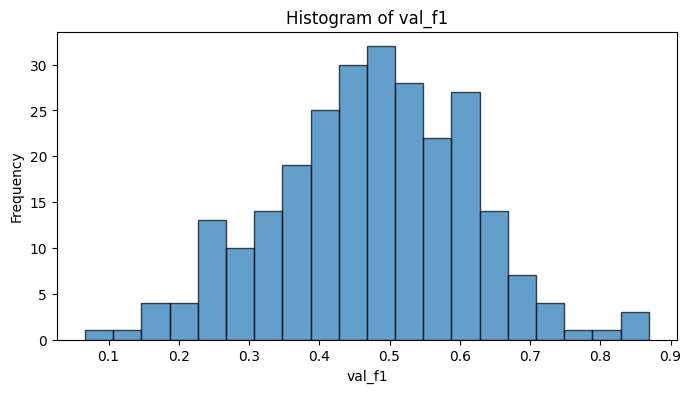

Shapiro-Wilk Test for val_loss: Statistic = 0.8731467723846436, P-value = 7.325300170049273e-14
val_loss does not look normally distributed (reject H0)


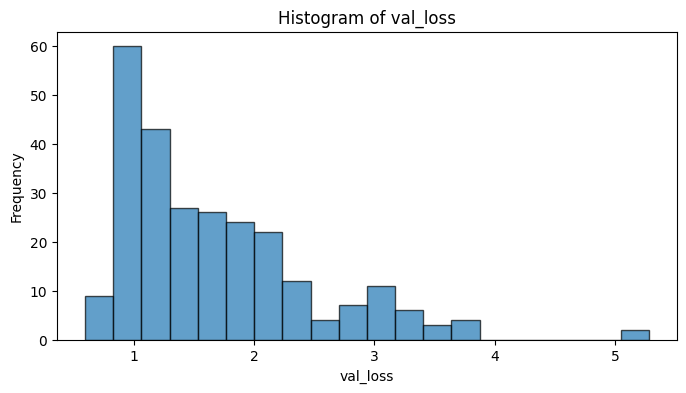

Shapiro-Wilk Test for val_precision: Statistic = 0.9905586838722229, P-value = 0.09105870872735977
val_precision looks normally distributed (fail to reject H0)


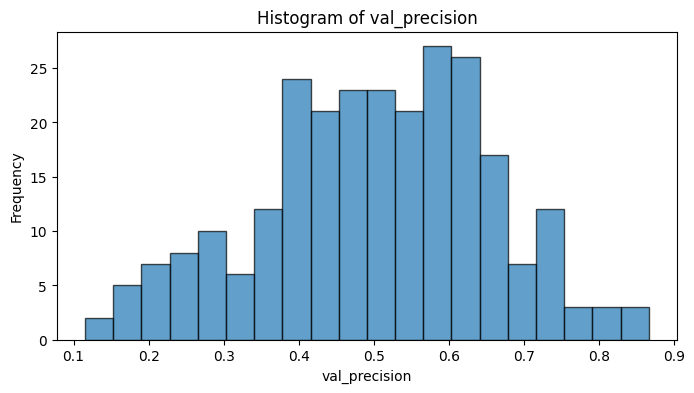

Shapiro-Wilk Test for val_recall: Statistic = 0.9953030347824097, P-value = 0.615339457988739
val_recall looks normally distributed (fail to reject H0)


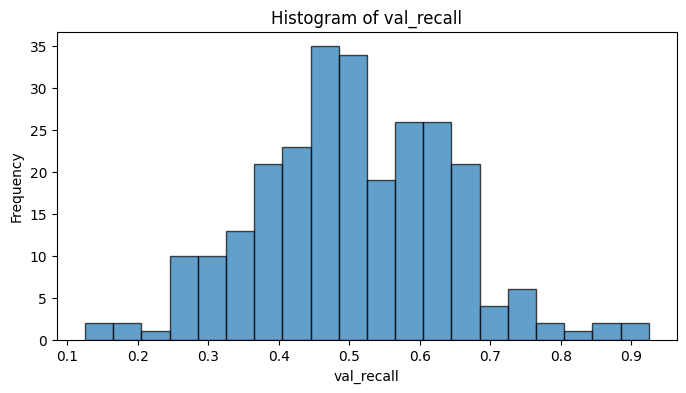

Model is not numeric and will be skipped


In [139]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv("/home/monika/Downloads/stats/globalanalysis/combined_data.csv")

# Perform Shapiro-Wilk Test for normality on each numeric metric and create a histogram
for column in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Drop NaN values from the column
        data = df[column].dropna()

        # Perform the Shapiro-Wilk test
        stat, p_value = stats.shapiro(data)
        print(f"Shapiro-Wilk Test for {column}: Statistic = {stat}, P-value = {p_value}")

        # Interpretation
        alpha = 0.05
        if p_value > alpha:
            print(f"{column} looks normally distributed (fail to reject H0)")
        else:
            print(f"{column} does not look normally distributed (reject H0)")

        # Plotting the histogram
        plt.figure(figsize=(8, 4))
        plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    else:
        print(f"{column} is not numeric and will be skipped")


In [163]:
import os
import pandas as pd

# Define the directory where your CSV files are located
directory_path = "/home/monika/Downloads/stats"

# Initialize an empty list to store DataFrames from each CSV file
data_frames = []

# Loop through each CSV file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        
        # Extract the model or fold name from the file name
        model_name = filename.split("_")[0]
        
        # Read the data from the current CSV file into a DataFrame
        data = pd.read_csv(file_path)
        
        # Add a column to store the model or fold name
        data['Model'] = model_name
        
        # Append the data DataFrame to the list
        data_frames.append(data)

# Concatenate all DataFrames in the list into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Define the path where you want to save the combined CSV file
output_csv_path = "/home/monika/Downloads/stats/globalanalysis/combined_data.csv"

# Save the combined data to a single CSV file
combined_data.to_csv(output_csv_path, index=False)

print(f"Combined data saved to {output_csv_path}")

Combined data saved to /home/monika/Downloads/stats/globalanalysis/combined_data.csv


Friedman Test Statistic: 2488.2854943468856
P-value: 0.0
There are significant differences between the models.


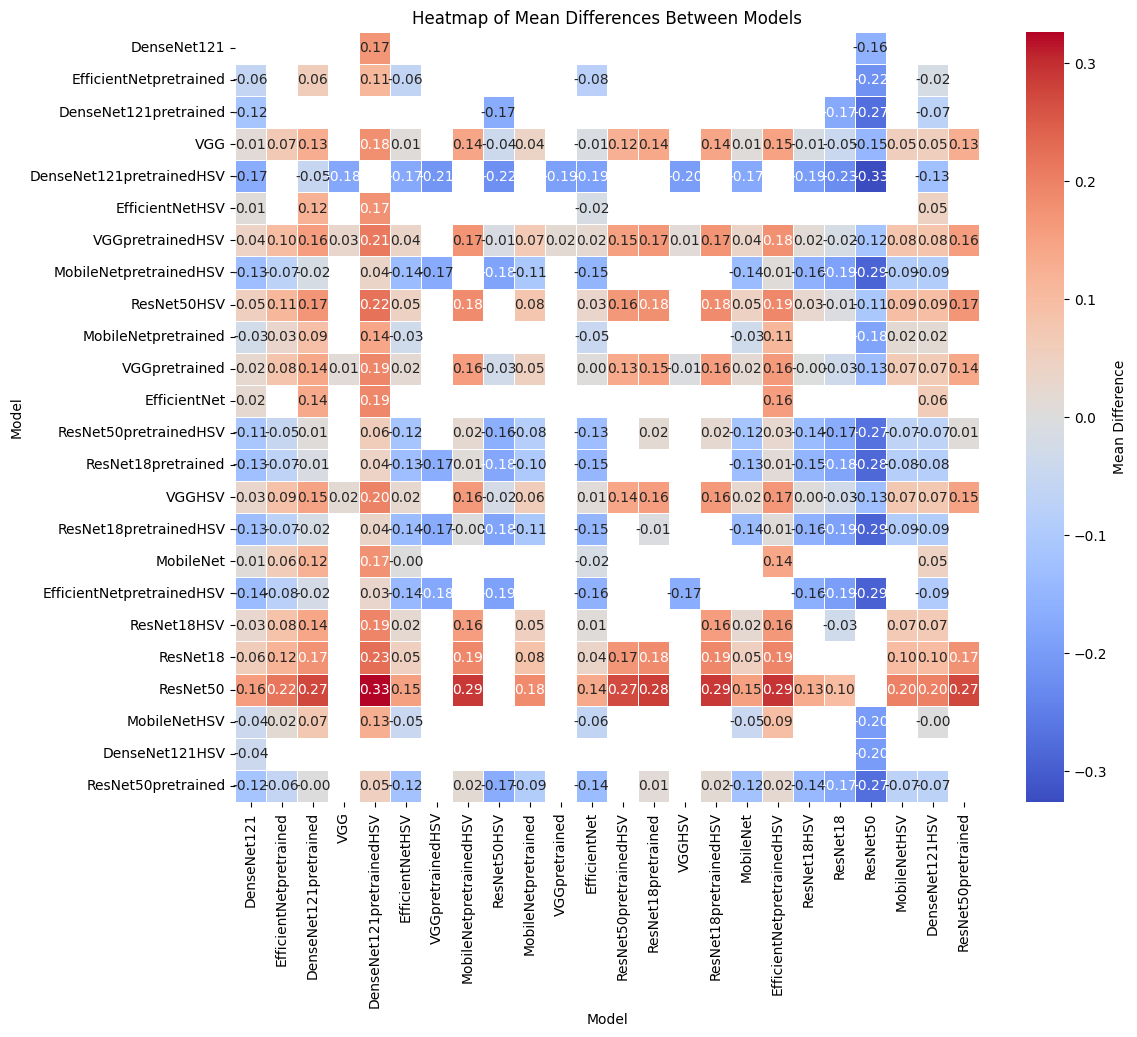

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("/home/monika/Downloads/stats/globalanalysis/combined_data.csv")

# Select the relevant columns containing the performance metrics
metrics_columns = ['test_accuracy', 'test_f1', 'test_loss', 'test_precision', 'test_recall', 'train_accuracy', 'train_f1', 'train_loss', 'train_precision', 'train_recall', 'val_accuracy', 'val_f1', 'val_loss', 'val_precision', 'val_recall']

# Filter out rows with missing values in any of the metrics columns
filtered_data = data.dropna(subset=metrics_columns)

# Perform the Friedman test on the filtered data
f_statistic, p_value = friedmanchisquare(*[filtered_data[col] for col in metrics_columns])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Friedman Test Statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There are significant differences between the models.")
    
    # Perform Conover's test for pairwise comparisons
    result = pairwise_tukeyhsd(filtered_data['val_accuracy'], filtered_data['Model'])

    # Extract model names
    models = filtered_data['Model'].unique()

    # Create a DataFrame to store the mean differences
    mean_diff_matrix = pd.DataFrame(np.nan, index=models, columns=models)

    # Populate the DataFrame with mean differences
    for row in result.summary().data[1:]:  # Skip the header row
        model1, model2, mean_diff, _, _, p_adj, reject = row
        mean_diff_matrix.loc[model1, model2] = mean_diff
        mean_diff_matrix.loc[model2, model1] = -mean_diff  # Symmetric

    # Mask to highlight significant differences
    mask = np.zeros_like(mean_diff_matrix, dtype=bool)
    for row in result.summary().data[1:]:  # Skip the header row
        model1, model2, _, _, _, p_adj, reject = row
        mask[model1 == models, model2 == models] = not reject

    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(mean_diff_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Mean Difference'})
    plt.title("Heatmap of Mean Differences Between Models")
    plt.xlabel("Model")
    plt.ylabel("Model")
    plt.show()
else:
    print("There are no significant differences between the models.")

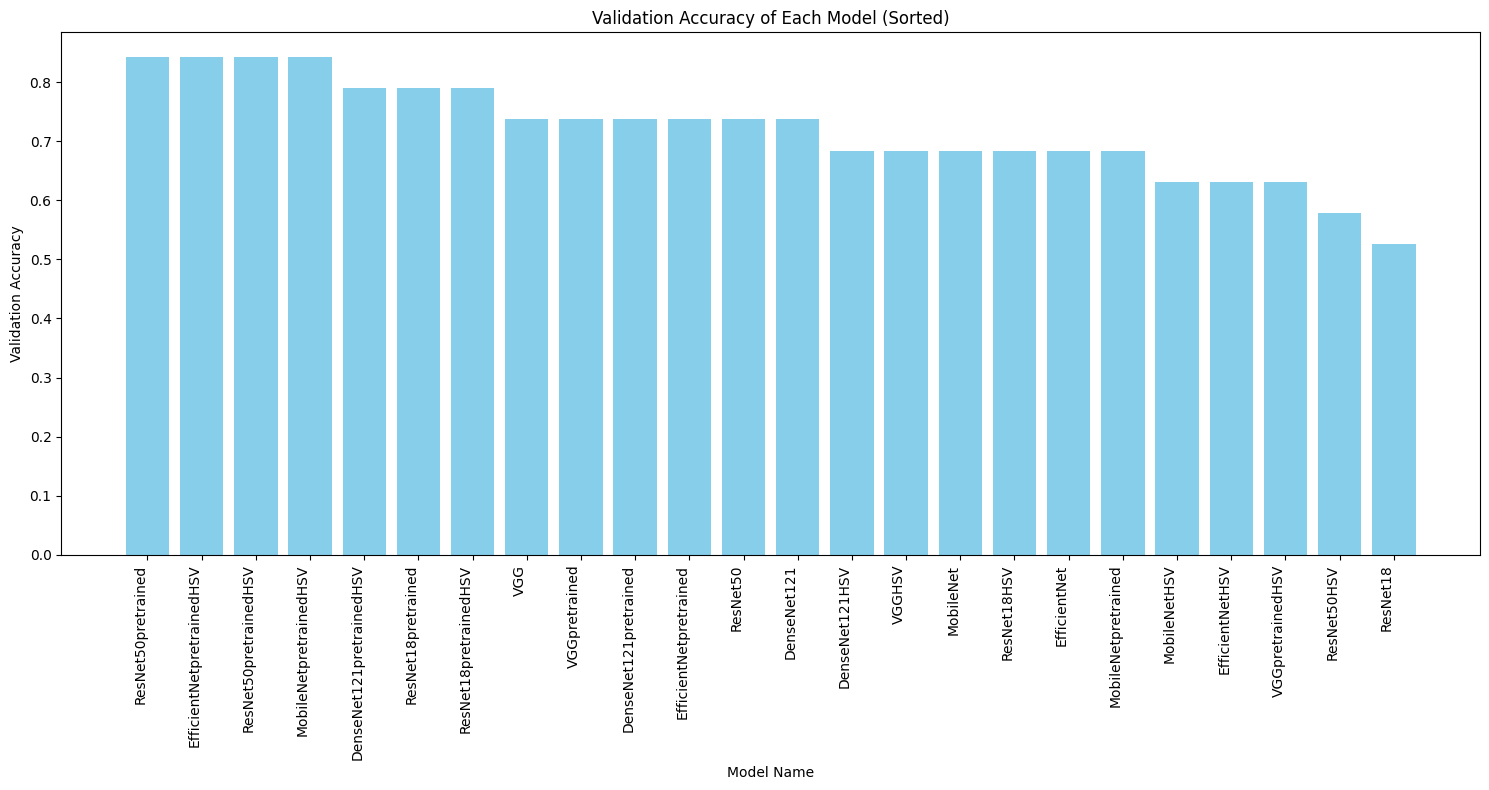

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/home/monika/Downloads/stats/globalanalysis/combined_data.csv'

# Reading the CSV file
data = pd.read_csv(file_path)

# Sorting the data in descending order by validation accuracy
sorted_data = data.sort_values('val_accuracy', ascending=False)

# Plotting
plt.figure(figsize=(15, 8))  # Increased figure size for better visibility
plt.bar(sorted_data['Model'], sorted_data['val_accuracy'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of Each Model (Sorted)')

# Adjusting the x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')  # Rotate labels 90 degrees and align them to the right

plt.tight_layout()
plt.show()

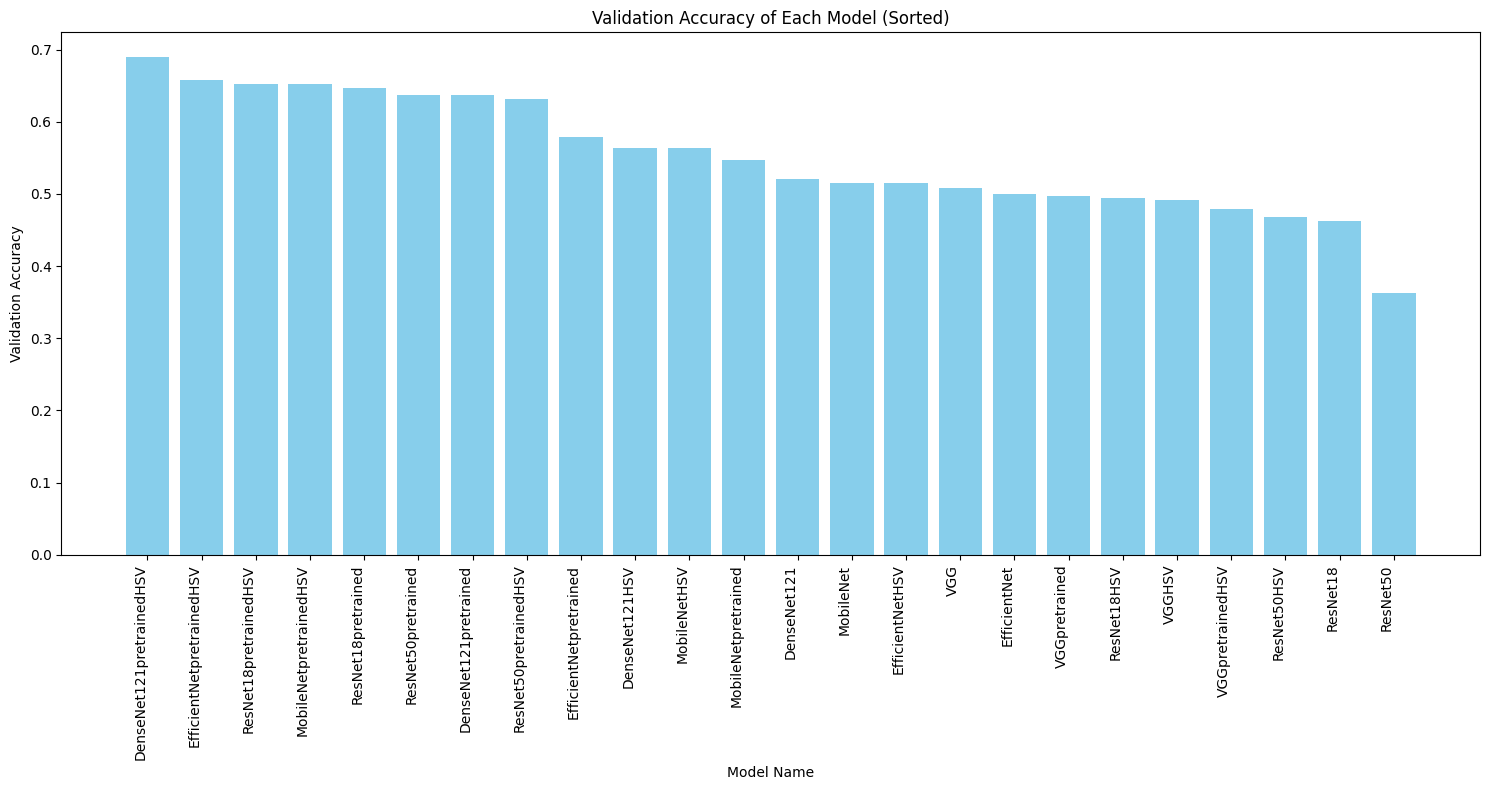

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the correct path to your CSV file
file_path = '/home/monika/Downloads/stats/globalanalysis/globalanalysis.csv'

# Reading the CSV file
data = pd.read_csv(file_path)

# Sorting the data in descending order by validation accuracy
sorted_data = data.sort_values('val_accuracy', ascending=False)

# Plotting
plt.figure(figsize=(15, 8))  # Increased figure size for better visibility

# Loop through the data and plot each bar individually, changing the color for specific models
for index, row in sorted_data.iterrows():
    color = 'red' if row['File'] in ['ResNet18pretrained.csv'] else 'skyblue'
    plt.bar(row['File'], row['val_accuracy'], color=color)

plt.xlabel('Model Name')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of Each Model (Sorted)')

# Adjusting the x-axis labels for better visibility
plt.xticks(rotation=90, ha='right')  # Rotate labels 90 degrees and align them to the right

plt.tight_layout()
plt.show()

Friedman Test Statistic: 2488.2854943468856
P-value: 0.0
There are significant differences between the models.


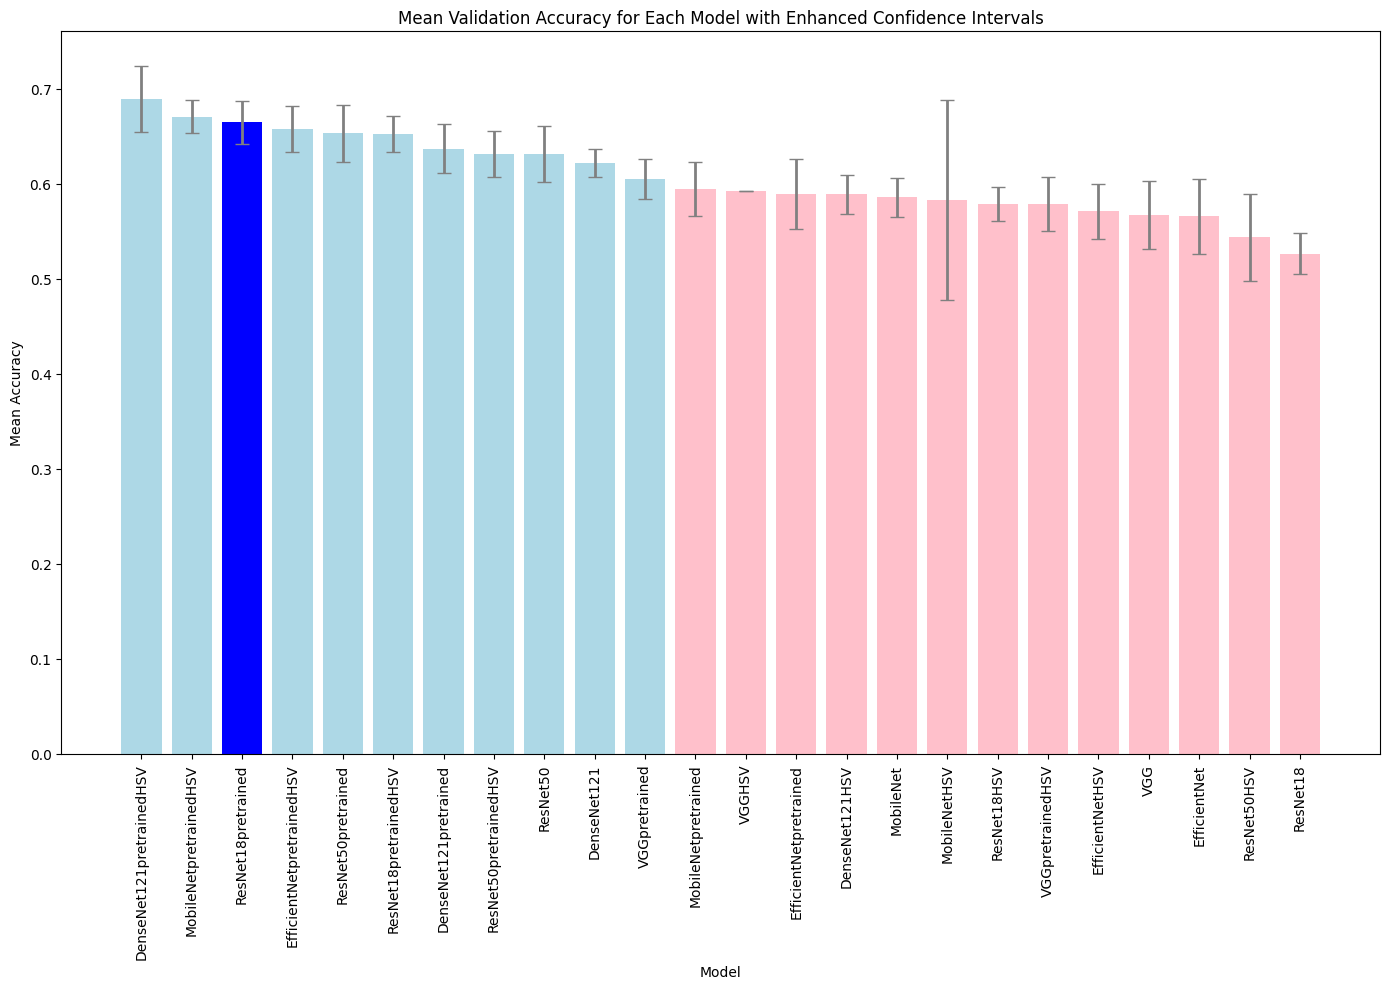

In [197]:
import pandas as pd
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to determine color based on accuracy and model name
def get_performance_color(accuracy, model_name):
    if model_name == 'ResNet18pretrained':
        return 'blue'  # Highlight ResNet18pretrained baseline
    elif accuracy >= 0.80:
        return 'darkblue'  # Dark blue for high performance
    elif accuracy >= 0.60:
        return 'lightblue'  # Light blue for good performance
    elif accuracy >= 0.50:
        return 'pink'  # Pink for average performance

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("/home/monika/Downloads/stats/globalanalysis/combined_data.csv")

# Select the relevant columns
metrics_columns = ['test_accuracy', 'test_f1', 'test_loss', 'test_precision', 'test_recall', 'train_accuracy', 'train_f1', 'train_loss', 'train_precision', 'train_recall', 'val_accuracy', 'val_f1', 'val_loss', 'val_precision', 'val_recall']

# Filter out rows with missing values in any of the metrics columns
filtered_data = data.dropna(subset=metrics_columns)

# Perform the Friedman test on the filtered data
f_statistic, p_value = friedmanchisquare(*[filtered_data[col] for col in metrics_columns])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Friedman Test Statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There are significant differences between the models.")
    
    # Perform Tukey HSD test for pairwise comparisons
    result = pairwise_tukeyhsd(filtered_data['val_accuracy'], filtered_data['Model'])

    # Filter the significant pairs
    significant_models = set()
    for row in result.summary().data[1:]:
        model1, model2, _, _, _, p_adj, reject = row
        if reject:
            significant_models.add(model1)
            significant_models.add(model2)

    # Filter the DataFrame for significant models and exclude models with accuracy below 50%
    significant_data = filtered_data[filtered_data['Model'].isin(significant_models) & (filtered_data['val_accuracy'] >= 0.50)]

    # Calculate the mean accuracy and SEM for each significant model
    mean_accuracy = significant_data.groupby('Model')['val_accuracy'].mean().reset_index()
    sem = significant_data.groupby('Model')['val_accuracy'].sem().reset_index()

    # Sort the models by mean accuracy in descending order
    mean_accuracy = mean_accuracy.sort_values(by='val_accuracy', ascending=False)

    # Create a figure for the plot with horizontally longer aspect
    plt.figure(figsize=(14, 10))

    # Iterate over the DataFrame rows and plot each bar individually with the color coding
    for index, row in mean_accuracy.iterrows():
        color = get_performance_color(row['val_accuracy'], row['Model'])
        plt.bar(row['Model'], row['val_accuracy'], color=color)

    # Add enhanced error bars
    plt.errorbar(x=mean_accuracy['Model'], y=mean_accuracy['val_accuracy'], yerr=sem['val_accuracy'], fmt='none', ecolor='gray', elinewidth=2, capsize=5)

    plt.title("Mean Validation Accuracy for Each Model with Enhanced Confidence Intervals")
    plt.ylabel("Mean Accuracy")
    plt.xlabel("Model")
    plt.xticks(rotation=90)  # Rotate model names to 90 degrees for better readability
    plt.tight_layout()  # Adjust the layout to fit everything comfortably

    plt.show()
else:
    print("There are no significant differences between the models.")

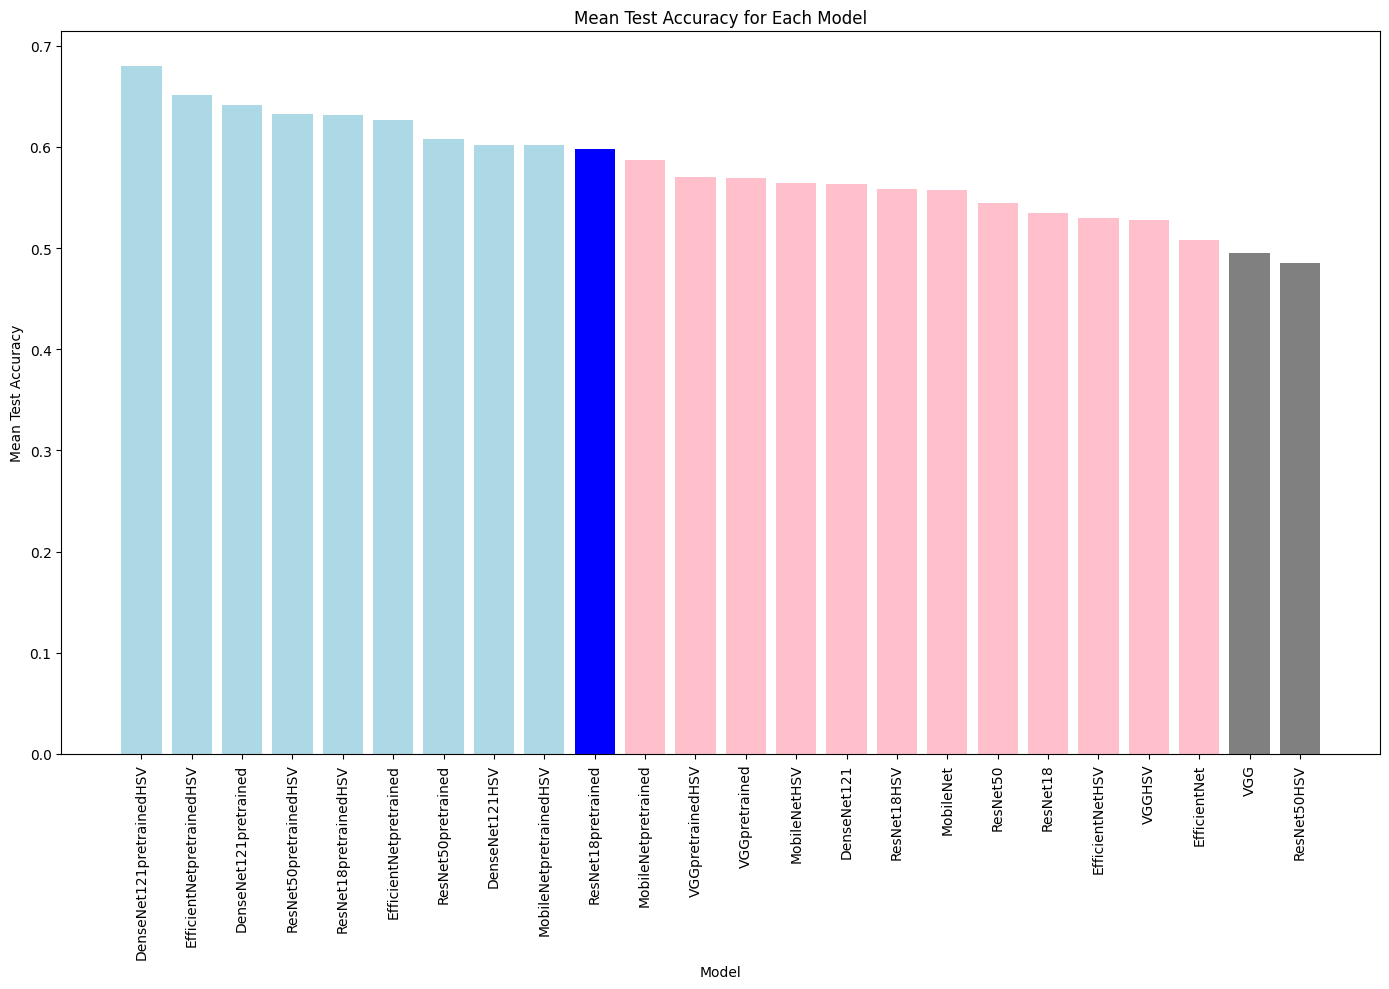

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to determine color based on accuracy and model name
def get_performance_color(accuracy, model_name):
    if model_name == 'ResNet18pretrained':
        return 'blue'  # Highlight ResNet18pretrained baseline
    elif accuracy >= 0.80:
        return 'darkblue'  # Dark blue for high performance
    elif accuracy >= 0.60:
        return 'lightblue'  # Light blue for good performance
    elif accuracy >= 0.50:
        return 'pink'  # Pink for average performance
    else:
        return 'gray'  # Gray for below average performance

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("/home/monika/Downloads/stats/globalanalysis/combined_data.csv")

# Calculate the mean test_accuracy for each model
mean_accuracy = data.groupby('Model')['test_accuracy'].mean().reset_index()

# Sort the models by mean accuracy in descending order
mean_accuracy = mean_accuracy.sort_values(by='test_accuracy', ascending=False)

# Create a figure for the plot
plt.figure(figsize=(14, 10))

# Iterate over the DataFrame rows and plot each bar individually with the color coding
for index, row in mean_accuracy.iterrows():
    color = get_performance_color(row['test_accuracy'], row['Model'])
    plt.bar(row['Model'], row['test_accuracy'], color=color)

plt.title("Mean Test Accuracy for Each Model")
plt.ylabel("Mean Test Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=90)  # Rotate model names for better readability
plt.tight_layout()  # Adjust the layout

plt.show()

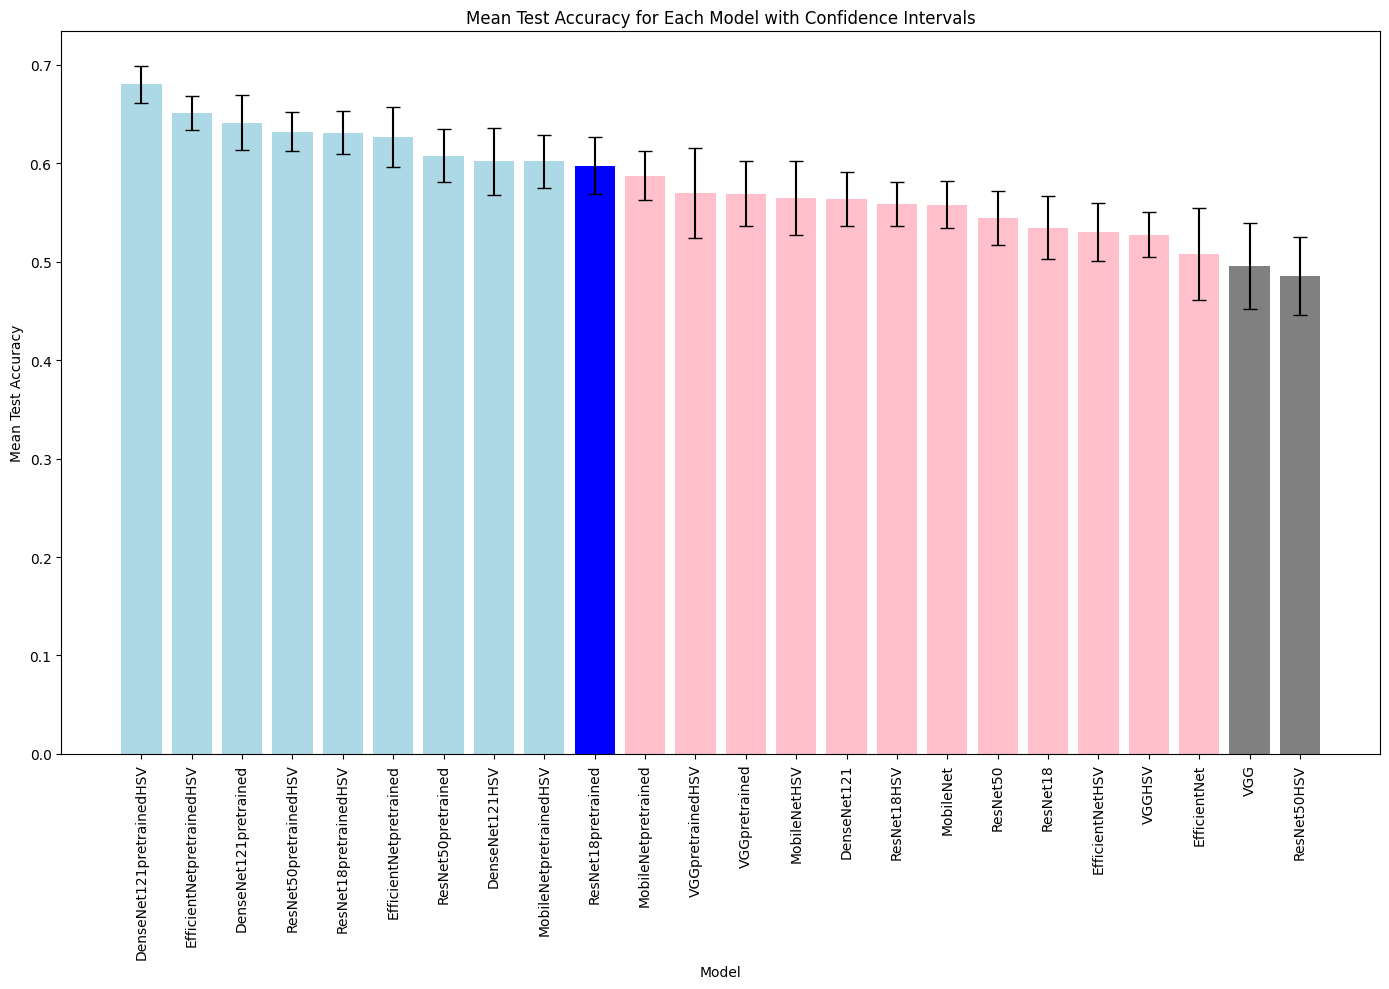

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for calculations

# Function to determine color based on accuracy and model name
def get_performance_color(accuracy, model_name):
    if model_name == 'ResNet18pretrained':
        return 'blue'  # Highlight ResNet18pretrained baseline
    elif accuracy >= 0.80:
        return 'darkblue'  # Dark blue for high performance
    elif accuracy >= 0.60:
        return 'lightblue'  # Light blue for good performance
    elif accuracy >= 0.50:
        return 'pink'  # Pink for average performance
    else:
        return 'gray'  # Gray for below average performance

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("/home/monika/Downloads/stats/globalanalysis/combined_data.csv")

# Calculate the mean, standard deviation, and sample size for test_accuracy for each model
stats = data.groupby('Model')['test_accuracy'].agg(['mean', 'std', 'count']).reset_index()

# Calculate the standard error
stats['stderr'] = stats['std'] / np.sqrt(stats['count'])

# Sort the models by mean accuracy in descending order
stats = stats.sort_values(by='mean', ascending=False)

# Create a figure for the plot
plt.figure(figsize=(14, 10))

# Iterate over the DataFrame rows and plot each bar with error bars
for index, row in stats.iterrows():
    color = get_performance_color(row['mean'], row['Model'])
    plt.bar(row['Model'], row['mean'], yerr=row['stderr'], color=color, capsize=5)  # Include error bars

plt.title("Mean Test Accuracy for Each Model with Confidence Intervals")
plt.ylabel("Mean Test Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=90)  # Rotate model names for better readability
plt.tight_layout()  # Adjust the layout

plt.show()

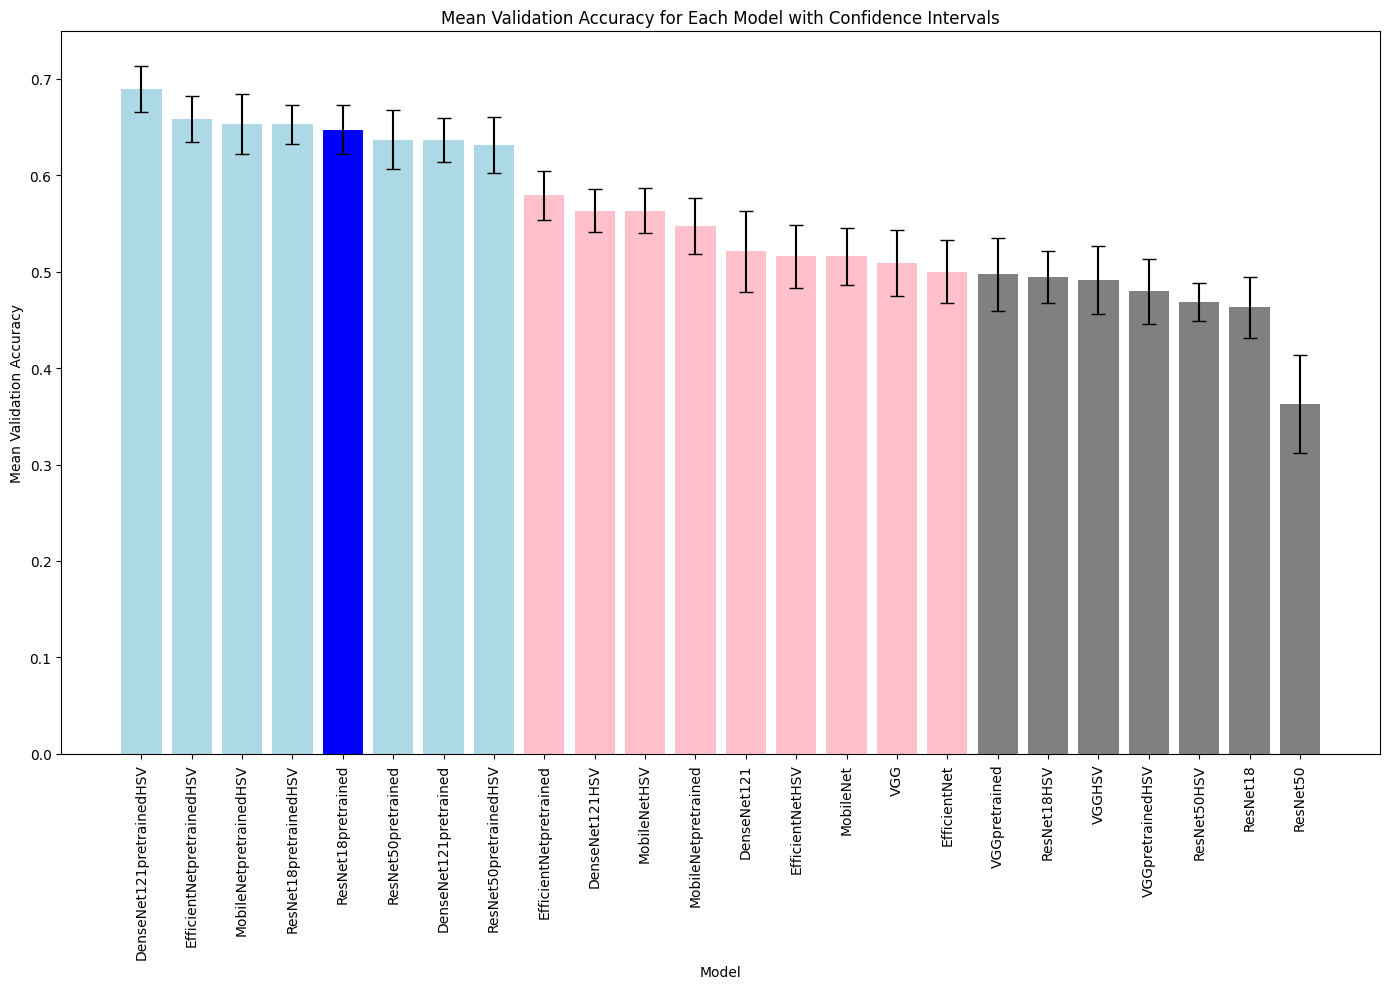

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for calculations

# Function to determine color based on accuracy and model name
def get_performance_color(accuracy, model_name):
    if model_name == 'ResNet18pretrained':
        return 'blue'  # Highlight ResNet18pretrained baseline
    elif accuracy >= 0.80:
        return 'darkblue'  # Dark blue for high performance
    elif accuracy >= 0.60:
        return 'lightblue'  # Light blue for good performance
    elif accuracy >= 0.50:
        return 'pink'  # Pink for average performance
    else:
        return 'gray'  # Gray for below average performance

# Load the CSV data into a Pandas DataFrame
data = pd.read_csv("/home/monika/Downloads/stats/globalanalysis/combined_data.csv")

# Calculate the mean, standard deviation, and sample size for test_accuracy for each model
stats = data.groupby('Model')['val_accuracy'].agg(['mean', 'std', 'count']).reset_index()

# Calculate the standard error
stats['stderr'] = stats['std'] / np.sqrt(stats['count'])

# Sort the models by mean accuracy in descending order
stats = stats.sort_values(by='mean', ascending=False)

# Create a figure for the plot
plt.figure(figsize=(14, 10))

# Iterate over the DataFrame rows and plot each bar with error bars
for index, row in stats.iterrows():
    color = get_performance_color(row['mean'], row['Model'])
    plt.bar(row['Model'], row['mean'], yerr=row['stderr'], color=color, capsize=5)  # Include error bars

plt.title("Mean Validation Accuracy for Each Model with Confidence Intervals")
plt.ylabel("Mean Validation Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=90)  # Rotate model names for better readability
plt.tight_layout()  # Adjust the layout

plt.show()

In [207]:
# If the delimiter is a tab
#results = pd.read_csv('/home/monika/Downloads/superior_models_ranking.txt', delimiter='\t')

# If the delimiter is a semicolon
#results = pd.read_csv('/home/monika/Downloads/superior_models_ranking.txt', delimiter=';')

# If the delimiter is a space (or multiple spaces)
results = pd.read_csv('/home/monika/Downloads/superior_models_ranking.txt', delim_whitespace=True)

print(results.head())

        group1                    group2  meandiff   p-adj   lower   upper  \
0  DenseNet121            DenseNet121HSV    0.0421  1.0000 -0.1154  0.1996   
1  DenseNet121     DenseNet121pretrained    0.1158  0.5152 -0.0417  0.2733   
2  DenseNet121  DenseNet121pretrainedHSV    0.1684  0.0214  0.0109  0.3260   
3  DenseNet121              EfficientNet   -0.0211  1.0000 -0.1786  0.1365   
4  DenseNet121           EfficientNetHSV   -0.0053  1.0000 -0.1628  0.1523   

   reject  
0   False  
1   False  
2    True  
3   False  
4   False  


In [1]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform t-tests and store results
t_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        t_stat, p_value = ttest_ind(resnet_data['test_accuracy'], model_data['test_accuracy'])
        t_test_results[model] = {'t-statistic': t_stat, 'p-value': p_value}

# Print the results
for model, result in t_test_results.items():
    print(f"Comparison with {model}: t-statistic = {result['t-statistic']}, p-value = {result['p-value']}")

Comparison with DenseNet121: t-statistic = 0.8533689709301224, p-value = 0.40355982369454846
Comparison with EfficientNetpretrained: t-statistic = -0.6923289609145963, p-value = 0.49669114621080934
Comparison with DenseNet121pretrained: t-statistic = -1.0840658783313866, p-value = 0.2912316085806111
Comparison with VGG: t-statistic = 1.9837378908836838, p-value = 0.06192427663834858
Comparison with DenseNet121pretrainedHSV: t-statistic = -2.4002439694296336, p-value = 0.026235395872322043
Comparison with EfficientNetHSV: t-statistic = 1.6377304932795227, p-value = 0.11711604263799284
Comparison with VGGpretrainedHSV: t-statistic = 0.5239645572821071, p-value = 0.6063620178500692
Comparison with MobileNetpretrainedHSV: t-statistic = -0.10820551019561533, p-value = 0.9149108786894373
Comparison with ResNet50HSV: t-statistic = 2.2746144340151715, p-value = 0.03409123813676378
Comparison with MobileNetpretrained: t-statistic = 0.2700278890985428, p-value = 0.789905453529193
Comparison with

In [3]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform t-tests and store results
t_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        t_stat, p_value = ttest_ind(resnet_data['test_accuracy'], model_data['test_accuracy'])
        t_test_results[model] = {'t-statistic': t_stat, 'p-value': p_value}

# Interpret the results
for model, result in t_test_results.items():
    print(f"Comparison with {model}:")
    print(f"  t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")
    
    # Interpretation based on p-value
    if result['p-value'] < 0.05:
        print("  Result: There is a statistically significant difference in performance.")
    else:
        print("  Result: There is no statistically significant difference in performance.")

Comparison with DenseNet121:
  t-statistic = 0.853, p-value = 0.404
  Result: There is no statistically significant difference in performance.
Comparison with EfficientNetpretrained:
  t-statistic = -0.692, p-value = 0.497
  Result: There is no statistically significant difference in performance.
Comparison with DenseNet121pretrained:
  t-statistic = -1.084, p-value = 0.291
  Result: There is no statistically significant difference in performance.
Comparison with VGG:
  t-statistic = 1.984, p-value = 0.062
  Result: There is no statistically significant difference in performance.
Comparison with DenseNet121pretrainedHSV:
  t-statistic = -2.400, p-value = 0.026
  Result: There is a statistically significant difference in performance.
Comparison with EfficientNetHSV:
  t-statistic = 1.638, p-value = 0.117
  Result: There is no statistically significant difference in performance.
Comparison with VGGpretrainedHSV:
  t-statistic = 0.524, p-value = 0.606
  Result: There is no statistically s

In [16]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform t-tests and store results
t_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        t_stat, p_value = ttest_ind(resnet_data['val_accuracy'], model_data['val_accuracy'])
        if p_value < 0.05:
            t_test_results[model] = {'t-statistic': t_stat, 'p-value': p_value}

# Print only the results that show a statistically significant difference
for model, result in t_test_results.items():
    print(f"Statistically significant difference in performance compared to {model}:")
    print(f"  t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")

Statistically significant difference in performance compared to DenseNet121:
  t-statistic = 2.556, p-value = 0.019
Statistically significant difference in performance compared to VGG:
  t-statistic = 3.281, p-value = 0.004
Statistically significant difference in performance compared to EfficientNetHSV:
  t-statistic = 3.187, p-value = 0.005
Statistically significant difference in performance compared to VGGpretrainedHSV:
  t-statistic = 4.008, p-value = 0.001
Statistically significant difference in performance compared to ResNet50HSV:
  t-statistic = 5.569, p-value = 0.000
Statistically significant difference in performance compared to MobileNetpretrained:
  t-statistic = 2.562, p-value = 0.019
Statistically significant difference in performance compared to VGGpretrained:
  t-statistic = 3.350, p-value = 0.003
Statistically significant difference in performance compared to EfficientNet:
  t-statistic = 3.546, p-value = 0.002
Statistically significant difference in performance compared

In [15]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform t-tests and store results
t_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        t_stat, p_value = ttest_ind(resnet_data['val_accuracy'], model_data['val_accuracy'])
        if p_value < 0.05:
            t_test_results[model] = {'t-statistic': t_stat, 'p-value': p_value}

# Print only the results that show a statistically significant difference
for model, result in t_test_results.items():
    print(f"Statistically significant difference in performance compared to {model}:")
    print(f"  t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}")

Statistically significant difference in performance compared to DenseNet121:
  t-statistic = 2.556, p-value = 0.019
Statistically significant difference in performance compared to VGG:
  t-statistic = 3.281, p-value = 0.004
Statistically significant difference in performance compared to EfficientNetHSV:
  t-statistic = 3.187, p-value = 0.005
Statistically significant difference in performance compared to VGGpretrainedHSV:
  t-statistic = 4.008, p-value = 0.001
Statistically significant difference in performance compared to ResNet50HSV:
  t-statistic = 5.569, p-value = 0.000
Statistically significant difference in performance compared to MobileNetpretrained:
  t-statistic = 2.562, p-value = 0.019
Statistically significant difference in performance compared to VGGpretrained:
  t-statistic = 3.350, p-value = 0.003
Statistically significant difference in performance compared to EfficientNet:
  t-statistic = 3.546, p-value = 0.002
Statistically significant difference in performance compared

In [19]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform t-tests and store results
t_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        t_stat, p_value = ttest_ind(resnet_data['val_f1'], model_data['val_f1'])

        # Check for statistical significance and higher mean performance
        if p_value < 0.05 and model_data['val_f1'].mean() > resnet_data['val_f1'].mean():
            t_test_results[model] = {'t-statistic': t_stat, 'p-value': p_value, 'mean_difference': model_data['val_f1'].mean() - resnet_data['val_f1'].mean()}

# Print only the results that show a statistically significant difference and outperformance
if t_test_results:
    for model, result in t_test_results.items():
        print(f"Model {model} statistically significantly outperformed ResNet18pretrained:")
        print(f"  t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}, mean difference = {result['mean_difference']:.3f}")
else:
    print("There are no significantly better models than ResNet18pretrained based on val_f1.")

There are no significantly better models than ResNet18pretrained based on val_f1.


In [21]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform t-tests and store results
t_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        t_stat, p_value = ttest_ind(resnet_data['test_accuracy'], model_data['test_accuracy'])

        # Check for statistical significance and higher mean performance
        if p_value < 0.05 and model_data['test_accuracy'].mean() > resnet_data['test_accuracy'].mean():
            t_test_results[model] = {'t-statistic': t_stat, 'p-value': p_value, 'mean_difference': model_data['test_accuracy'].mean() - resnet_data['test_accuracy'].mean()}

# Print only the results that show a statistically significant difference and outperformance
if t_test_results:
    for model, result in t_test_results.items():
        print(f"Model {model} statistically significantly outperformed ResNet18pretrained:")
        print(f"  t-statistic = {result['t-statistic']:.3f}, p-value = {result['p-value']:.3f}, mean difference = {result['mean_difference']:.3f}")
else:
    print("There are no significantly better models than ResNet18pretrained based on val_f1.")

Model DenseNet121pretrainedHSV statistically significantly outperformed ResNet18pretrained:
  t-statistic = -2.400, p-value = 0.026, mean difference = 0.083


In [1]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform Mann-Whitney U tests and store results
mwu_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        stat, p_value = mannwhitneyu(resnet_data['test_accuracy'], model_data['test_accuracy'])

        # Check for statistical significance and higher median performance
        if p_value < 0.05 and model_data['test_accuracy'].median() > resnet_data['test_accuracy'].median():
            mwu_test_results[model] = {'U-statistic': stat, 'p-value': p_value, 'median_difference': model_data['test_accuracy'].median() - resnet_data['test_accuracy'].median()}

# Print only the results that show a statistically significant difference and outperformance
if mwu_test_results:
    for model, result in mwu_test_results.items():
        print(f"Model {model} statistically significantly outperformed ResNet18pretrained based on test_accuracy:")
        print(f"  U-statistic = {result['U-statistic']:.3f}, p-value = {result['p-value']:.3f}, median difference = {result['median_difference']:.3f}")
else:
    print("There are no significantly better models than ResNet18pretrained based on test_accuracy.")

Model DenseNet121pretrainedHSV statistically significantly outperformed ResNet18pretrained based on test_accuracy:
  U-statistic = 27.000, p-value = 0.029, median difference = 0.067


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
data = pd.read_csv('/home/monika/Downloads/stats/globalanalysis/combined_data.csv')

# Filter data for ResNet18pretrained and other models
resnet_data = data[data['Model'] == 'ResNet18pretrained']
other_models = data['Model'].unique()

# Perform Mann-Whitney U tests and store results
mwu_test_results = {}

for model in other_models:
    if model != 'ResNet18pretrained':
        model_data = data[data['Model'] == model]
        stat, p_value = mannwhitneyu(resnet_data['val_accuracy'], model_data['val_accuracy'])

        # Check for statistical significance and higher median performance
        if p_value < 0.05 and model_data['val_accuracy'].median() > resnet_data['val_accuracy'].median():
            mwu_test_results[model] = {'U-statistic': stat, 'p-value': p_value, 'median_difference': model_data['val_accuracy'].median() - resnet_data['val_accuracy'].median()}

# Print only the results that show a statistically significant difference and outperformance
if mwu_test_results:
    for model, result in mwu_test_results.items():
        print(f"Model {model} statistically significantly outperformed ResNet18pretrained based on val_accuracy:")
        print(f"  U-statistic = {result['U-statistic']:.3f}, p-value = {result['p-value']:.3f}, median difference = {result['median_difference']:.3f}")
else:
    print("There are no significantly better models than ResNet18pretrained based on val_accuracy.")
    
'''
Output: There are no significantly better models than ResNet18pretrained based on val_accuracy.
'''

In [ ]:
import os
import pandas as pd

def create_global_analysis_file(directory, output_file='globalanalysis.csv', file_extension='csv'):
    """
    Create a file that compiles the mean values and mean runtime for each file in the directory.
    The file will have common headers, with file names on the left column and
    mean values for each header calculated, along with the mean runtime.
    
    :param directory: Directory containing the files to process
    :param output_file: Name of the file to be created (default is 'globalanalysis.csv')
    :param file_extension: Extension of the files to process (default is 'csv')
    """
    all_data = []

    # Extract mean values and mean runtime from each file
    for filename in os.listdir(directory):
        if filename.endswith(f".{file_extension}"):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)

            # Check if 'Runtime' column exists and convert it to numeric, handling non-numeric values
            if 'Runtime' in df.columns:
                df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
                mean_runtime = df['Runtime'].mean()
            else:
                mean_runtime = 'N/A'

            # Extract the means of numeric columns only
            numeric_df = df.select_dtypes(include=[np.number])
            means = numeric_df.mean().to_dict()
            means['Mean Fold Runtime'] = mean_runtime
            means['File'] = filename  # Add filename

            all_data.append(means)

    # Combine all data into a single DataFrame
    combined_data = pd.DataFrame(all_data)

    # Save to the specified output file
    combined_data.to_csv(output_file, index=False)
    print(f"Global analysis file created: {output_file}")

# Usage
directory = "/home/monika/Downloads/stats (copy)"
output_directory = "/home/monika/Downloads/stats/globalanalysis"
output_file_path = os.path.join(output_directory, 'globalanalysis.csv')
create_global_analysis_file(directory, output_file=output_file_path)

In [ ]:
import pandas as pd

file_name = "/home/monika/Downloads/stats/globalanalysis/globalanalysis.csv"

# Load the CSV file
data = pd.read_csv(file_name)

# Print all column names to check
print("Columns in the DataFrame:")
print(data.columns)

# Check if 'Mean Fold Runtime' column exists
if 'Mean Fold Runtime' in data.columns:
    # Convert the 'Mean Fold Runtime' from seconds to minutes
    data['Mean Fold Runtime'] = data['Mean Fold Runtime'] / 60
    print("Conversion successful. Here's a preview of the updated data:")
    print(data.head())
else:
    print("Column 'Mean Fold Runtime' not found in the CSV.")

In [ ]:
import pandas as pd

file_name = "/home/monika/Downloads/stats/globalanalysis/globalanalysis.csv"

# Load the CSV file
data = pd.read_csv(file_name)

# Check if 'Mean Fold Runtime' column exists
if 'Mean Fold Runtime' in data.columns:
    # Convert the 'Mean Fold Runtime' from seconds to minutes
    data['Mean Fold Runtime'] = data['Mean Fold Runtime'] / 60
    print("Conversion successful. Here's a preview of the updated data:")
    print(data.head())

    # Save the updated DataFrame back to CSV
    updated_file_name = "/home/monika/Downloads/stats/globalanalysis/globalanalysis_updated.csv"
    data.to_csv(updated_file_name, index=False)
    print(f"Updated file saved as: {updated_file_name}")
else:
    print("Column 'Mean Fold Runtime' not found in the CSV.")

In [ ]:
import pandas as pd
import os
import numpy as np

def process_files_append_mean_std(directory, file_extension='csv'):
    """
    Process all files in the specified directory with the given file extension.
    Calculates the mean and standard deviation of each numeric column and appends them to the file.
    Non-numeric columns are ignored.
    
    :param directory: Directory containing the files
    :param file_extension: Extension of the files to process (default is 'csv')
    """
    # List all files in the directory with the specified extension
    for filename in os.listdir(directory):
        if filename.endswith(f".{file_extension}"):
            file_path = os.path.join(directory, filename)
            
            # Read the file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Calculate mean and standard deviation of each numeric column
            means = df.select_dtypes(include=[np.number]).mean()
            std_devs = df.select_dtypes(include=[np.number]).std()
            
            # Append the mean and standard deviation as new rows
            mean_row = pd.Series({col: means[col] if col in means else np.nan for col in df.columns})
            std_dev_row = pd.Series({col: std_devs[col] if col in std_devs else np.nan for col in df.columns})
            df = pd.concat([df, pd.DataFrame([mean_row, std_dev_row])], ignore_index=True)
            
            # Save the updated DataFrame back to file
            df.to_csv(file_path, index=False)
            print(f"Processed and updated {filename} with mean and standard deviation")

directory = "/home/monika/Downloads/stats_copy"
process_files_append_mean_std(directory)  # This will process CSV files in the specified directory

In [ ]:
import pandas as pd
import os
import numpy as np

def process_files_append_mean_std_combined(directory, file_extension='csv'):
    """
    Process all files in the specified directory with the given file extension.
    Calculates the mean and standard deviation of each numeric column and appends them in a combined format (mean ± std) to the file.
    Non-numeric columns are ignored.
    
    :param directory: Directory containing the files
    :param file_extension: Extension of the files to process (default is 'csv')
    """
    # List all files in the directory with the specified extension
    for filename in os.listdir(directory):
        if filename.endswith(f".{file_extension}"):
            file_path = os.path.join(directory, filename)
            
            # Read the file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Calculate mean and standard deviation of each numeric column
            means = df.select_dtypes(include=[np.number]).mean()
            std_devs = df.select_dtypes(include=[np.number]).std()

            # Combine mean and standard deviation in a single string for each column
            combined_stats = means.astype(str) + " ± " + std_devs.astype(str)
            
            # Append the combined stats as a new row
            combined_stats_row = pd.Series({col: combined_stats[col] if col in combined_stats else np.nan for col in df.columns})
            df = pd.concat([df, pd.DataFrame([combined_stats_row])], ignore_index=True)
            
            # Save the updated DataFrame back to file
            df.to_csv(file_path, index=False)
            print(f"Processed and updated {filename} with combined mean and standard deviation")

directory = "/home/monika/Downloads/stats_copy"
process_files_append_mean_std_combined(directory)  # This will process CSV files in the specified directory

In [ ]:
import pandas as pd
import os
import numpy as np

def process_files_append_mean_std_combined(directory, file_extension='csv'):
    """
    Process all files in the specified directory with the given file extension.
    Calculates the mean and standard deviation of each numeric column and appends them in a combined format (mean ± std, both rounded to two decimal places) to the file.
    Non-numeric columns are ignored.
    
    :param directory: Directory containing the files
    :param file_extension: Extension of the files to process (default is 'csv')
    """
    # List all files in the directory with the specified extension
    for filename in os.listdir(directory):
        if filename.endswith(f".{file_extension}"):
            file_path = os.path.join(directory, filename)
            
            # Read the file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Calculate mean and standard deviation of each numeric column
            means = df.select_dtypes(include=[np.number]).mean().round(2)
            std_devs = df.select_dtypes(include=[np.number]).std().round(2)

            # Combine mean and standard deviation in a single string for each column
            combined_stats = means.astype(str) + " ± " + std_devs.astype(str)
            
            # Append the combined stats as a new row
            combined_stats_row = pd.Series({col: combined_stats[col] if col in combined_stats else np.nan for col in df.columns})
            df = pd.concat([df, pd.DataFrame([combined_stats_row])], ignore_index=True)
            
            # Save the updated DataFrame back to file
            df.to_csv(file_path, index=False)
            print(f"Processed and updated {filename} with combined mean and standard deviation (rounded to two decimal places)")

directory = "/home/monika/Downloads/stats_copy"
process_files_append_mean_std_combined(directory)  # This will process CSV files in the specified directory

In [ ]:
import os
import pandas as pd

def create_global_analysis_file(directory, output_file='globalanalysisSTD.csv', file_extension='csv'):
    """
    Create a file that compiles the mean values for each file in the directory.
    The file will have common headers, with file names on the left column and
    mean values for each header calculated.
    
    :param directory: Directory containing the files to process
    :param output_file: Name of the file to be created (default is 'globalanalysis.csv')
    :param file_extension: Extension of the files to process (default is 'csv')
    """
    all_means = []

    # Extract mean values from each file
    for filename in os.listdir(directory):
        if filename.endswith(f".{file_extension}"):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)

            # Assuming the last row contains the means
            means = df.iloc[-1]
            means.name = filename  # Set the filename as the name of the Series
            all_means.append(means)

    # Combine all means into a single DataFrame
    combined_means = pd.concat(all_means, axis=1).T

    # Set the index to file names and reset it to make it a column
    combined_means.index.name = 'File'
    combined_means.reset_index(inplace=True)

    # Save to the specified output file
    combined_means.to_csv(output_file, index=False)
    print(f"Global analysis file created: {output_file}")

# Usage
directory = "/home/monika/Downloads/stats_copy"
output_directory = "/home/monika/Downloads/stats_copy/globalanalysis/"
output_file_path = os.path.join(output_directory, 'globalanalysisSTD.csv')
create_global_analysis_file(directory, output_file=output_file_path)

In [ ]:
import pandas as pd

def sort_csv_by_validation_loss(file_path):
    """
    Load a CSV file, sort it based on the 'Validation Loss' column, and update the file.

    :param file_path: Path to the CSV file
    """
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Sort the DataFrame based on 'Validation Loss' in ascending order
    sorted_df = df.sort_values(by='val loss', ascending=True)

    # Save the sorted DataFrame back to the file
    sorted_df.to_csv(file_path, index=False)
    print(f"File updated: {file_path}")

file_path = '/home/monika/Downloads/stats/globalanalysis/globalanalysis_updated_sorted_.csv'
sort_csv_by_validation_loss(file_path)